# Time Series Forecasting with LSTM-generator

On this notebook, we will try to predict the alcohol sales for unknown future for 1 month using LSTM-generator. 
You can find more informations about data in that site:
* https://fred.stlouisfed.org/series/S4248SM144NCEN


Let's import libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 




In [4]:
df = pd.read_excel('the data.xlsx', index_col= 'DATE', parse_dates=True)
#df.index.freq = 'MS'

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21191 entries, 2020-01-01 to 2022-09-13
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HR      21143 non-null  float64
 1   SWT     21143 non-null  float64
 2   SWD     21143 non-null  float64
 3   SWS     21143 non-null  float64
 4   R       21143 non-null  float64
 5   Dst     21143 non-null  float64
 6   F10.7   21143 non-null  float64
dtypes: float64(7)
memory usage: 1.3 MB


In [4]:
df.columns= ['Sales']

In [5]:
df.head()

,Sales
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


<AxesSubplot:xlabel='DATE'>

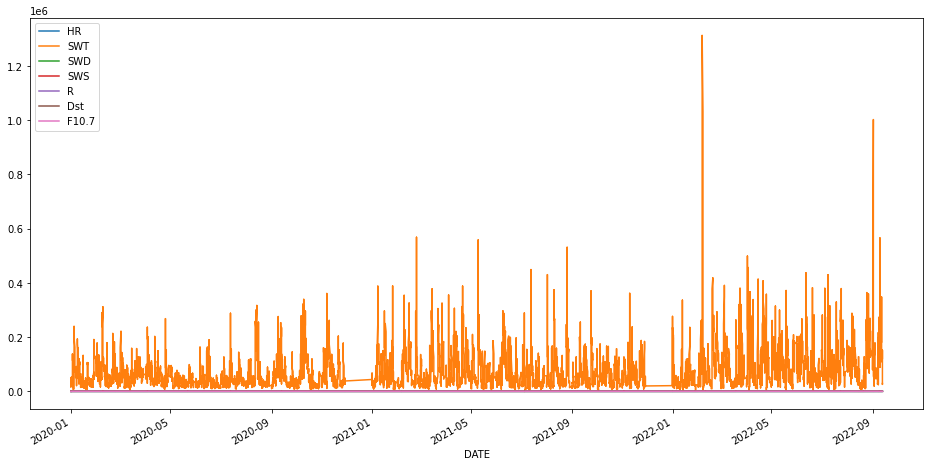

In [6]:
df.plot(figsize=(16,8))

As we can see, we have 17 years sale data. And this data is acting like time series data.

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [8]:
result= seasonal_decompose(df['Sales'])

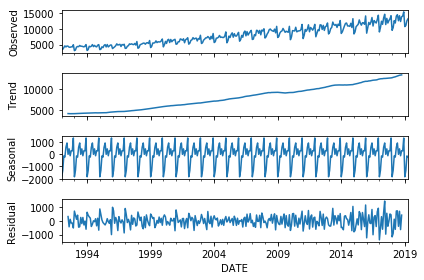

In [9]:
result.plot();

In [7]:
len(df)

21191

In [27]:
train = df.iloc[:1500]
test= df.iloc[1500:]

In [28]:
test= test[0:500]

In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 500 entries, 2020-03-05 to 2020-03-26
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HR      500 non-null    float64
 1   SWT     500 non-null    float64
 2   SWD     500 non-null    float64
 3   SWS     500 non-null    float64
 4   R       500 non-null    float64
 5   Dst     500 non-null    float64
 6   F10.7   500 non-null    float64
dtypes: float64(7)
memory usage: 31.2 KB


In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler()

In [32]:
scaler.fit(train)

MinMaxScaler()

In [33]:
scaled_train = scaler.transform(train)

In [34]:
scaled_test = scaler.transform(test) 

In [35]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [36]:
len(scaled_train)

1500

Now, we will start to create LSTM model for forecasting.

In [37]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [38]:
n_input = 7
n_feature = 7

train_generator = TimeseriesGenerator(scaled_train,scaled_train,length=n_input, batch_size=1)

In [39]:
model = Sequential()

model.add(LSTM(128,activation = 'relu', input_shape= (n_input, n_feature), return_sequences=True))
model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(LSTM(128, activation='relu', return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 7, 128)            69632     
                                                                 
 lstm_7 (LSTM)               (None, 7, 128)            131584    
                                                                 
 lstm_8 (LSTM)               (None, 128)               131584    
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 332,929
Trainable params: 332,929
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.fit_generator(train_generator,epochs= 50)

Epoch 1/50


C:\Users\Mcs\AppData\Local\Temp/ipykernel_12916/1176801577.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator,epochs= 50)


1493/1493 [==============================] - 17s 9ms/step - loss: 0.0673
Epoch 2/50
1493/1493 [==============================] - 13s 9ms/step - loss: 0.0659
Epoch 3/50
1493/1493 [==============================] - 13s 9ms/step - loss: 0.0655
Epoch 4/50
1493/1493 [==============================] - 13s 9ms/step - loss: 0.0653
Epoch 5/50
1493/1493 [==============================] - 13s 9ms/step - loss: 0.0650
Epoch 6/50
1493/1493 [==============================] - 13s 9ms/step - loss: 0.0650
Epoch 7/50
1493/1493 [==============================] - 13s 9ms/step - loss: 0.0648
Epoch 8/50
1493/1493 [==============================] - 13s 9ms/step - loss: 0.0648
Epoch 9/50
1493/1493 [==============================] - 12s 8ms/step - loss: 0.0649
Epoch 10/50
1493/1493 [==============================] - 13s 8ms/step - loss: 0.0648
Epoch 11/50
1493/1493 [==============================] - 13s 8ms/step - loss: 0.0647
Epoch 12/50
1493/1493 [==============================] - 12s 8ms/step - loss: 0.0646


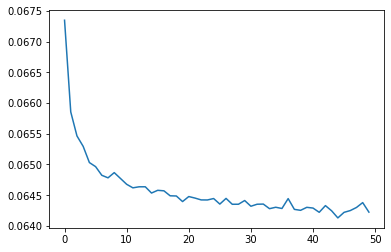

In [42]:
my_loss= model.history.history['loss']
plt.plot(range(len(my_loss)),my_loss)

In [43]:
first_eval_batch = scaled_train[-12:]

In [44]:
first_eval_batch

array([[0.        , 0.28712686, 0.2231405 , 0.43055556, 0.        ,
        0.7260274 , 0.2       ],
       [0.04347826, 0.283104  , 0.23140496, 0.39722222, 0.        ,
        0.67123288, 0.2       ],
       [0.08695652, 0.20941184, 0.1446281 , 0.40555556, 0.        ,
        0.5890411 , 0.2       ],
       [0.13043478, 0.2184723 , 0.11983471, 0.41944444, 0.        ,
        0.5890411 , 0.2       ],
       [0.17391304, 0.22702374, 0.11570248, 0.41944444, 0.        ,
        0.5890411 , 0.2       ],
       [0.2173913 , 0.27913369, 0.11983471, 0.41666667, 0.        ,
        0.5890411 , 0.2       ],
       [0.26086957, 0.23312206, 0.11157025, 0.41666667, 0.        ,
        0.5890411 , 0.2       ],
       [0.30434783, 0.23137171, 0.10743802, 0.41666667, 0.        ,
        0.57534247, 0.2       ],
       [0.34782609, 0.23259335, 0.08677686, 0.39722222, 0.        ,
        0.53424658, 0.2       ],
       [0.39130435, 0.2205806 , 0.08264463, 0.36944444, 0.        ,
        0.5890411 , 0.2

In [45]:
first_eval_batch = first_eval_batch.reshape((1,n_input,n_feature))

ValueError: cannot reshape array of size 84 into shape (1,7,7)

In [30]:
model.predict(first_eval_batch)

array([[1.0206845]], dtype=float32)

# Forecast Using RNN Model

In [49]:
#holding my predictions
test_predictions = []


# last n_input points from the training set
first_eval_batch = scaled_train[-n_input:]
# reshape this to the format RNN wants (same format as TimeseriesGeneration)
current_batch = first_eval_batch.reshape((1,n_input,n_feature))

#how far into the future will I forecast?

for i in range(len(test)):
    
    # One timestep ahead of historical 12 points
    current_pred = model.predict(current_batch)[0]
    
    #store that prediction
    test_predictions.append(current_pred)
    
    # UPDATE current batch o include prediction
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis= 1)

1/1 [==============================] - 1s 507ms/step


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 7 and the array at index 1 has size 1

In [48]:
test_predictions

NameError: name 'test_predictions' is not defined

In [47]:
true_predictions = scaler.inverse_transform(test_predictions)

NameError: name 'test_predictions' is not defined

In [34]:
true_predictions

array([[14971.98773932],
       [15824.23884046],
       [13055.73964065],
       [14515.09875441],
       [13180.72842646],
       [13979.87482631],
       [14623.81639808],
       [15337.39739823],
       [10728.30386776],
       [12103.49360591],
       [13802.86008513],
       [13954.50512147]])

In [46]:
test['Predictions'] =true_predictions

NameError: name 'true_predictions' is not defined

In [36]:
test.head()

,Sales,Predictions
DATE,,
2018-05-01,14138,14971.987739
2018-06-01,14583,15824.238840
2018-07-01,12640,13055.739641
2018-08-01,14257,14515.098754
2018-09-01,12396,13180.728426


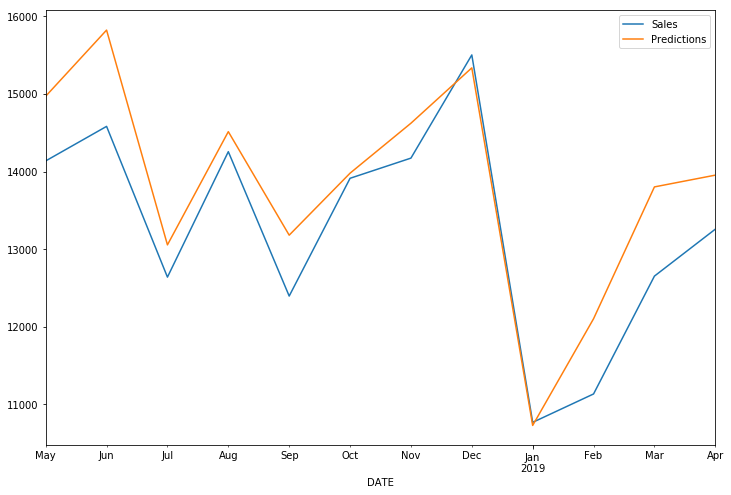

In [37]:
test.plot(figsize=(12,8))

In [38]:
model.save('mycoolmodel.h5')

Our model is not bad!

Thanks:) If you like it please vote. 